In [28]:
!pip3 install wordcloud

     -------------------------------------- 300.0/300.0 KB 2.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Eliana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [41]:
import tiktoken
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy
import matplotlib.pyplot as plt
import re

In [21]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eliana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [44]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eliana\AppData\Roaming\nltk_data...


Chargement des données

In [15]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)


In [16]:
df.rename(columns={0: 'polarity', 1: 'id', 2: 'date', 3: 'query', 4: 'user', 5: 'text'}, inplace= True)
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
df.drop(['id', 'date', 'query', 'user'], axis=1, inplace=True)
df

,polarity,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [33]:
lab_to_sentiment = {0:"Negative", 2:"Neutre", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]

Text(0.5, 1.0, 'Sentiment Data Distribution')

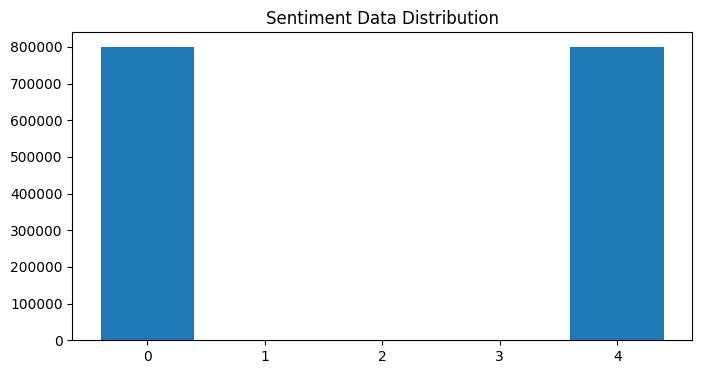

In [34]:
val_count = df.polarity.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

Normalisation

In [45]:
stop_words = stopwords.words('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
wnl = WordNetLemmatizer()

def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip() #tester aussi sans lower pour voir la différence
  tokens = []
  for token in text.split():
    if token not in stop_words:
      tokens.append(wnl.lemmatize(token))
  return " ".join(tokens)

In [46]:
df.text = df.text.apply(lambda x: preprocess(x))

In [47]:
df.head()

,polarity,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save 50 rest go b...
3,0,whole body feel itchy like fire
4,0,behaving mad see


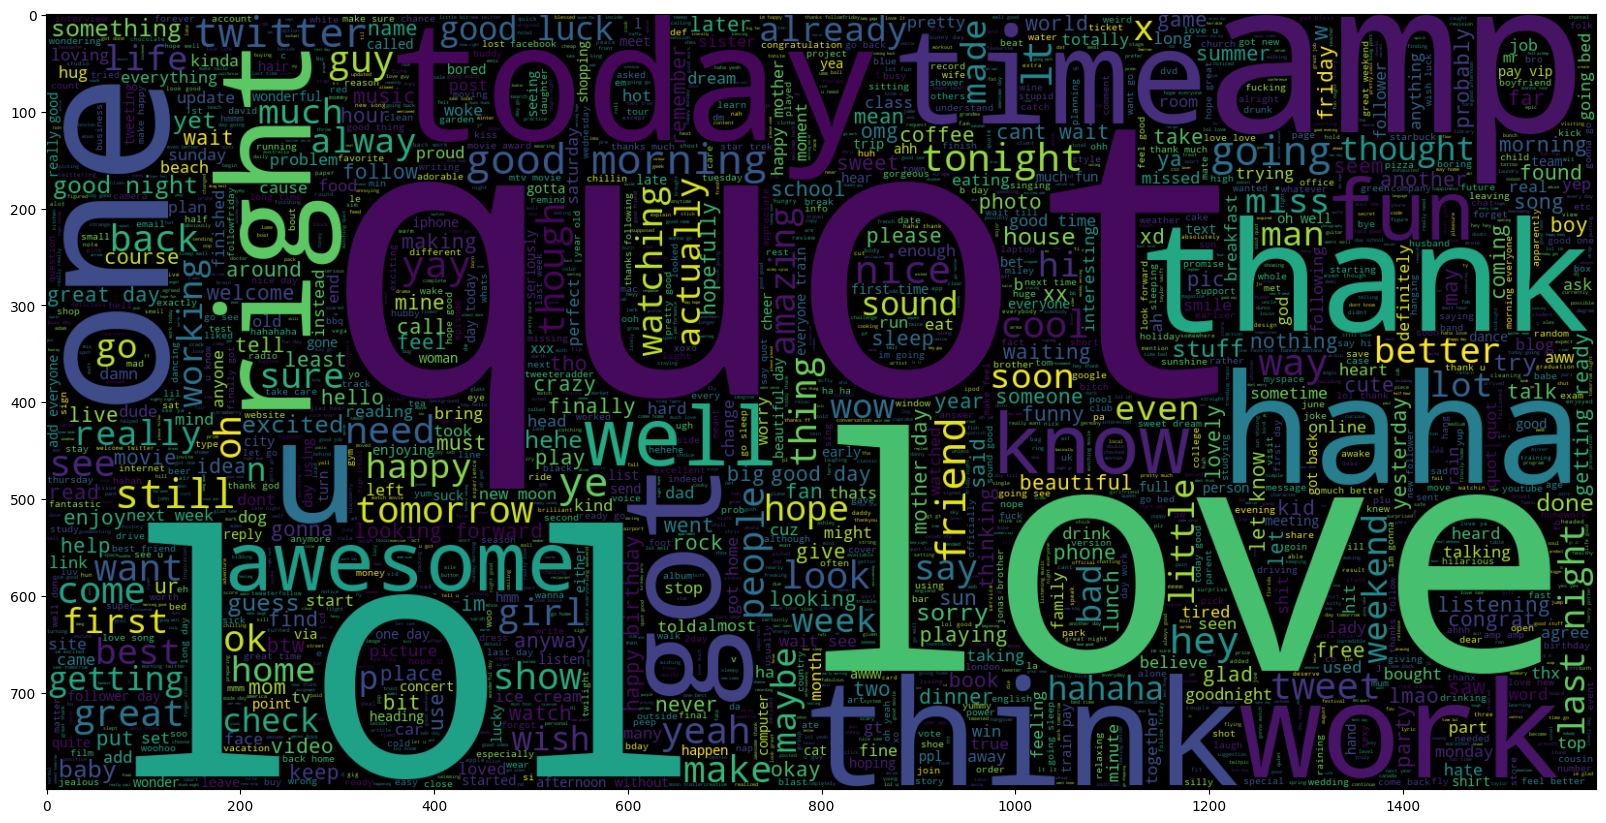

In [48]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.polarity == 4].text))
plt.imshow(wc , interpolation = 'bilinear')

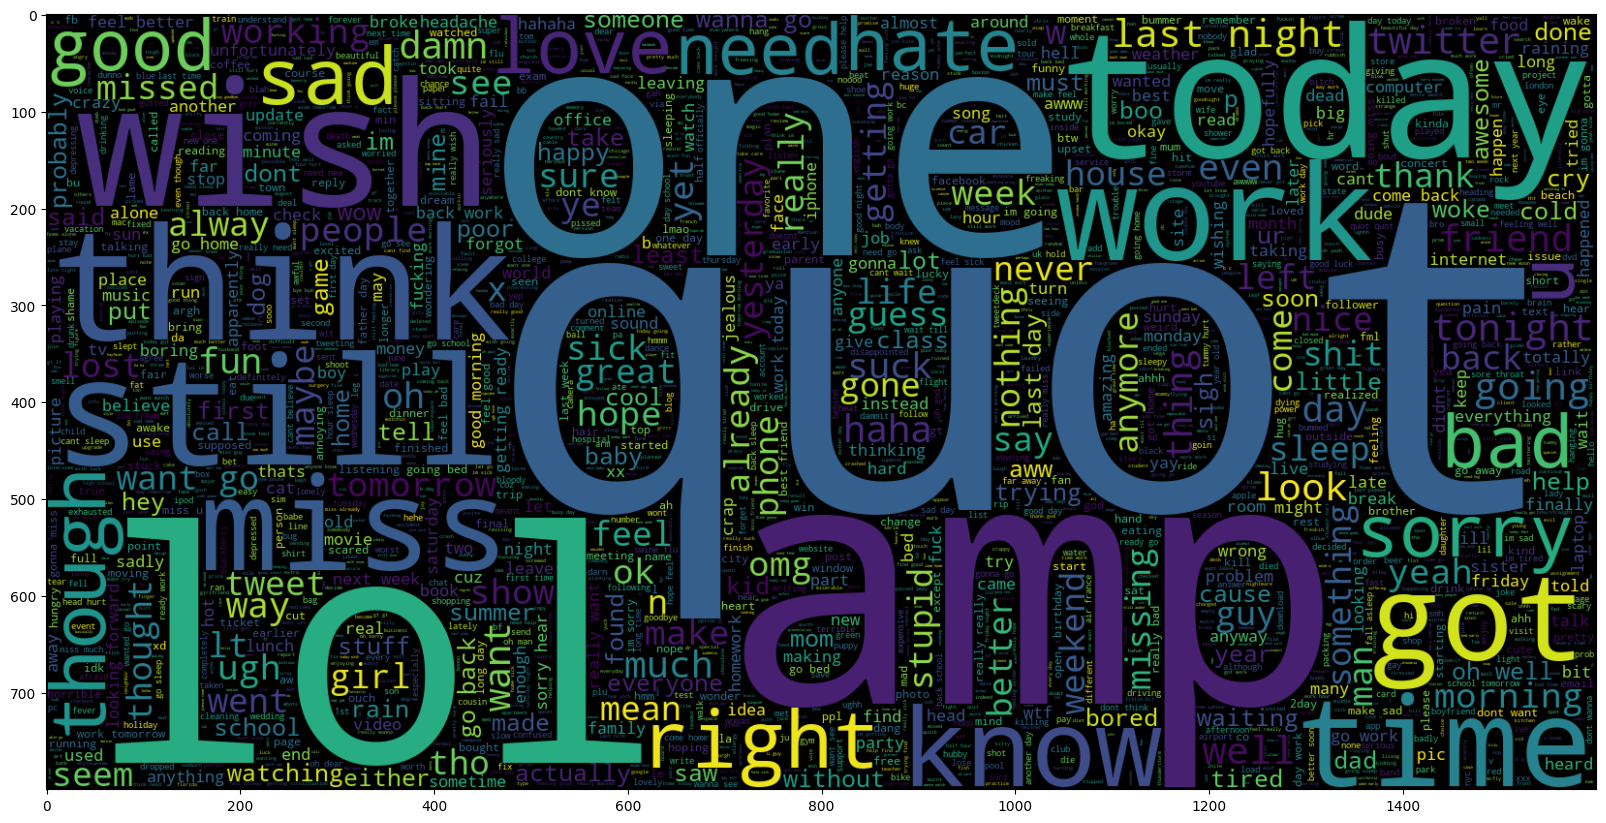

In [49]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.polarity == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Fonction de création de tokens

In [50]:
def word_tokenizer(doc):
    tokens = word_tokenize(doc)
    return tokens

def byte_pair_tokenize(doc):
    enc = tiktoken.encoding_for_model("gpt-4")
    tokens = enc.encode(doc)
    return [str(token) for token in tokens]